| Data name| In master function |  All years dataframe
| -------- | -------- |  -------- | 
|Schüler/-innen je Lehrkraft | teachers_yyyy| teachers_concat
|Anzahl an Lehrkräften | students_per_teacher_yyyy| students_per_teacher_concat
|Anzahl an Schülern | students_yyyy| students_concat
|Unterichtsstd. Je Schüler	| hours_per_student_yyyy|hours_per_student_concat
|Ausgaben 	| ausgaben_yyyy|ausgaben_concat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
#plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from master_dr import ausgaben_concat

/Users/david/Documents/capstone_project_hh_23_1/master_dr.py:289: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  noten_data.iloc[:, 1:] = noten_data.iloc[:, 1:].apply(lambda x: x.str.replace('.', ''))
/Users/david/Documents/capstone_project_hh_23_1/master_dr.py:310: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  noten_data.iloc[:, 0:] = noten_data.iloc[:, 0:].astype(int)
/Users/david/Documents/capstone_project_hh_23_1/master_dr.py:289: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strin

In [3]:
ausgaben_concat.tail()

,Federal States,Allg bildende Schulen,Berufliche Schulen Insgesamt,darunter: im Dualen System,Alle Schularten,Grund schulen,Hauptschulen,Schulen mit mehreren Bildungsgängen,Realschulen,Gymnasien,Integrierte Gesamt schulen,Personalausgaben,Laufender Sach-aufwand,Investi-tionsaus-gaben,Gesamtausgaben,darunter: von staatlicher Ebene,year
11,Saarland,9300,5700,3600,8400,7900,0,0,0,9300,9300,6700,1200,500,8400,6600,2021-01-01
12,Sachsen,9200,6400,4400,8700,7400,0,9100,0,9700,0,6400,1100,1200,8700,6100,2021-01-01
13,Sachsen-Anhalt,9200,5700,3700,8600,7100,0,9300,0,9800,9400,6800,800,1000,8600,6600,2021-01-01
14,Schleswig-Holstein,9400,6300,4500,8600,7800,0,0,0,8800,10400,6700,1200,700,8600,6300,2021-01-01
15,Thüringen,9900,7900,5000,9500,7600,0,10500,0,11100,10800,7900,900,700,9500,7600,2021-01-01


In [4]:
#ausgaben_concat['Abitur Schuler'] = ausgaben_concat['Allg bildende Schulen'] + ausgaben_concat['Gymnasien']+ ausgaben_concat['Integrierte Gesamt schulen'] / 3


#### States with the highest investment per student

In [5]:
# Group by State and Year, calculate mean fail Rate
state_year_invest = ausgaben_concat.groupby(['Federal States', 'year'])['Allg bildende Schulen'].mean().reset_index()

# Sort by fail Rate in descending order
state_year_invest_sorted = state_year_invest.sort_values(by='Allg bildende Schulen', ascending=False)

# Get state with highest fail Rate per year
state_with_highest_invest = state_year_invest_sorted.groupby('year').first()

state_with_highest_invest

,Federal States,Allg bildende Schulen
year,,
2010-01-01,Thüringen,8600.0
2011-01-01,Thüringen,8500.0
2012-01-01,Thüringen,8500.0
2013-01-01,Hamburg,8900.0
2014-01-01,Hamburg,9500.0
2015-01-01,Berlin,9700.0
2016-01-01,Hamburg,10100.0
2017-01-01,Hamburg,10700.0
2019-01-01,Berlin,12100.0


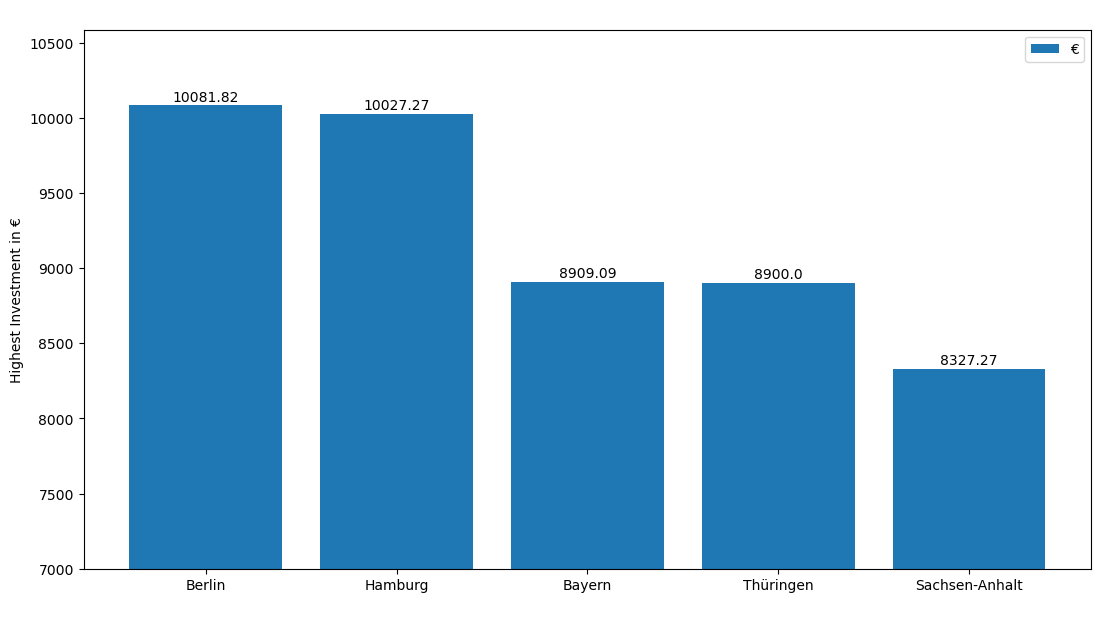

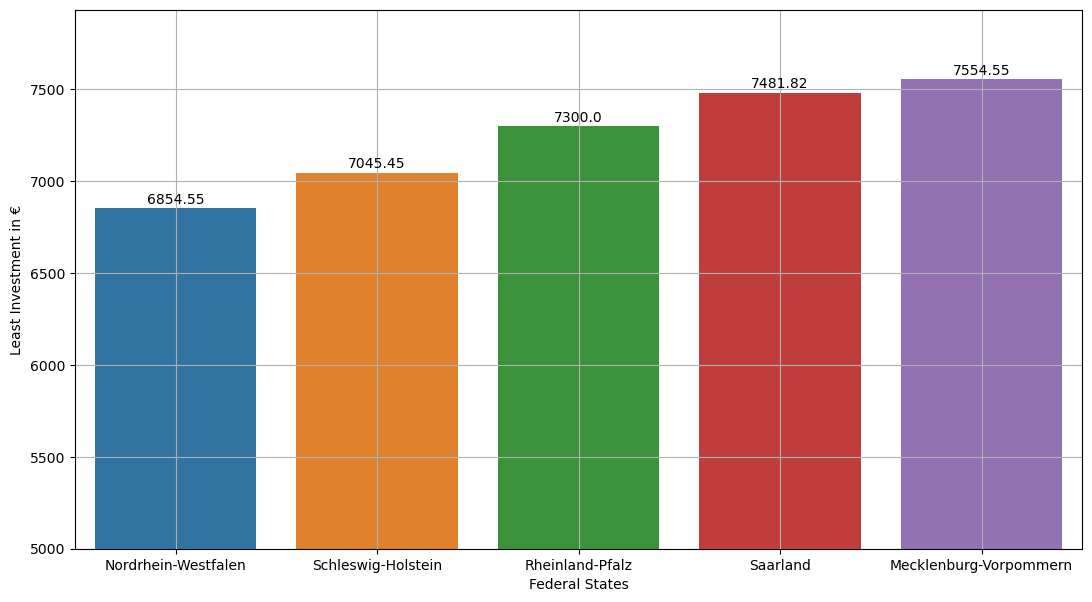

In [6]:
# Calculate the average passing rate for each state
df_avg = ausgaben_concat.groupby('Federal States')['Allg bildende Schulen'].mean().reset_index()
df_avg1 = ausgaben_concat.groupby('Federal States')['Allg bildende Schulen'].mean().reset_index()

# Sort the states based on average Pass Rate
top_states_highest = df_avg.sort_values('Allg bildende Schulen', ascending=False).head(5)
top_states_lowest = df_avg1.sort_values('Allg bildende Schulen', ascending=True).head(5)

plt.figure(figsize=(13, 7))
plt.style.context("/tmp/rose-pine.mplstyle")
#plt.rcParams.update({'font.size': 14})
# Create a bar chart for top 3 states with highest Pass Rate
plt.bar(top_states_highest['Federal States'], top_states_highest['Allg bildende Schulen'])#, color='#002845')#, palette="Blues_d")
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
plt.xlabel(' ')
plt.ylabel('Highest Investment in €')
plt.title(' ')
plt.legend(['€'])
plt.ylim(bottom=7000)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['Allg bildende Schulen']):
    plt.text(i, v + 30, str(round(v, 2)), ha='center', color='black')

plt.show()



plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
sns.barplot(x=top_states_lowest['Federal States'], y=top_states_lowest['Allg bildende Schulen'])#, color='#002845')
plt.grid(True)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Least Investment in €')
#plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
#plt.legend(['€'])
plt.ylim(bottom=5000)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['Allg bildende Schulen']):
    plt.text(i, v + 25, str(round(v, 2)), ha='center', color='black')

plt.show()


In [7]:
df_avg.sort_values('Allg bildende Schulen', ascending=False)

,Federal States,Allg bildende Schulen
2,Berlin,10081.818182
5,Hamburg,10027.272727
1,Bayern,8909.090909
15,Thüringen,8900.0
13,Sachsen-Anhalt,8327.272727
4,Bremen,8281.818182
12,Sachsen,7863.636364
6,Hessen,7818.181818
3,Brandenburg,7681.818182
0,Baden-Württemberg,7572.727273


In [8]:
df_avg.rename(columns={'Allg bildende Schulen':'avg_abitur_student in €'}, inplace=True)

In [9]:
'''schulform = pd.read_csv("./data/graduation_gender_insgesamt.csv", delimiter=";")

schulform_ins = schulform.filter(like='ins')
schulform_specific = schulform.filter(items=['Bundesland', 'Schulabschluss'])
schulform = pd.concat([schulform_specific, schulform_ins], axis=1)


schulform.rename(columns={'09_10_ins':'2010','10_11_ins':'2011','11_12_ins':'2012',
'12_13_ins':'2013','13_14_ins':'2014','14_15_ins':'2015','15_16_ins':'2016','16_17_ins':'2017',
'17_18_ins':'2018','18_19_ins':'2019','19_20_ins':'2020','20_21_ins':'2021'}, inplace=True)

schulform = schulform.melt(id_vars=['Bundesland', 'Schulabschluss'], var_name='Year', value_name='Students')

schulform = schulform[schulform['Year'] != 'Insgesamt']
schulform = schulform[schulform['Students'] != 'Schulform']

schulform['Year'] = pd.to_datetime(schulform['Year'], format='%Y')
schulform.iloc[:, 3:4] = schulform.iloc[:, 3:4].applymap(lambda x: x.replace('-', '0'))
schulform.iloc[:, 3:4] = schulform.iloc[:, 3:4].astype('Int64')
'''

'schulform = pd.read_csv("./data/graduation_gender_insgesamt.csv", delimiter=";")\n\nschulform_ins = schulform.filter(like=\'ins\')\nschulform_specific = schulform.filter(items=[\'Bundesland\', \'Schulabschluss\'])\nschulform = pd.concat([schulform_specific, schulform_ins], axis=1)\n\n\nschulform.rename(columns={\'09_10_ins\':\'2010\',\'10_11_ins\':\'2011\',\'11_12_ins\':\'2012\',\n\'12_13_ins\':\'2013\',\'13_14_ins\':\'2014\',\'14_15_ins\':\'2015\',\'15_16_ins\':\'2016\',\'16_17_ins\':\'2017\',\n\'17_18_ins\':\'2018\',\'18_19_ins\':\'2019\',\'19_20_ins\':\'2020\',\'20_21_ins\':\'2021\'}, inplace=True)\n\nschulform = schulform.melt(id_vars=[\'Bundesland\', \'Schulabschluss\'], var_name=\'Year\', value_name=\'Students\')\n\nschulform = schulform[schulform[\'Year\'] != \'Insgesamt\']\nschulform = schulform[schulform[\'Students\'] != \'Schulform\']\n\nschulform[\'Year\'] = pd.to_datetime(schulform[\'Year\'], format=\'%Y\')\nschulform.iloc[:, 3:4] = schulform.iloc[:, 3:4].applymap(lambda x

In [10]:
import pandas as pd
schulform = pd.read_csv("./Tableau/avg_abitur_graduation_rate_sorted.csv")#, delimiter=";")


In [11]:
schulform.rename(columns={'avg_abitur_graduation_rate':'avg_abitur_graduation_rate in %'}, inplace=True)
schulform

,Federal States,avg_abitur_graduation_rate in %
0,Hamburg,54.245235
1,Berlin,43.284471
2,Brandenburg,40.182324
3,Nordrhein-Westfalen,38.589521
4,Bremen,37.329971
5,Mecklenburg-Vorpommern,34.349382
6,Rheinland-Pfalz,33.982679
7,Schleswig-Holstein,33.972585
8,Saarland,33.655349
9,Thüringen,32.854860


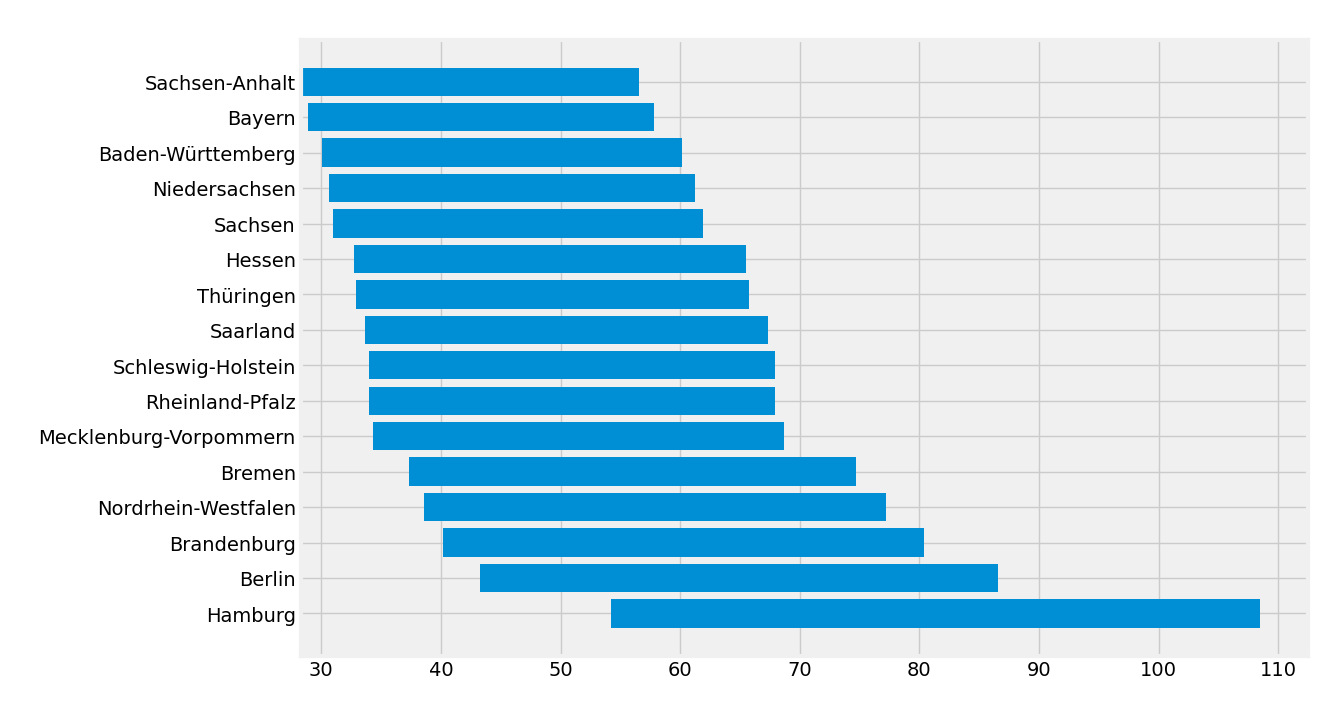

In [12]:
top_states_highest = schulform.sort_values('avg_abitur_graduation_rate in %', ascending=True)

plt.figure(figsize=(13, 8))
plt.style.use('fivethirtyeight')
# Create a horizontal bar chart
plt.barh(schulform['Federal States'], schulform['avg_abitur_graduation_rate in %'], left=schulform['avg_abitur_graduation_rate in %'])#, palette="Blues_d")#, color='#1f77b4')
# Add value labels to the bars
'''for i, (value, name) in enumerate(zip(top_states_highest['avg_abitur_graduation_rate in %'], top_states_highest['Federal States'])):
    plt.text(value, i, f' %{value:.0f}', ha='left', va='center', fontsize=12)'''

# Set the title and axis labels
plt.title(' ')
plt.xlabel(' ')
plt.ylabel(' ')
# Set the x-axis limits
#plt.xlim(1000, max(top_states_highest) * 1.1)
#plt.ylim(bottom=0)  # Set the y-axis lower limit to 0
plt.show()

In [13]:
# average investment for each year

ausgaben_test = ausgaben_concat.groupby('year')['Allg bildende Schulen'].mean().reset_index()
ausgaben_test

,year,Allg bildende Schulen
0,2010-01-01,6881.25
1,2011-01-01,6987.5
2,2012-01-01,7193.75
3,2013-01-01,7350.0
4,2014-01-01,7656.25
5,2015-01-01,7781.25
6,2016-01-01,7937.5
7,2017-01-01,8206.25
8,2019-01-01,9050.0
9,2020-01-01,9712.5


In [14]:
# save as csv-file
#ausgaben_test.to_csv('./Tableau/avg_investment_per_year.csv', index=False)

In [15]:
# nur zum testen, obs geklappt hat.

ausg = pd.read_csv('./Tableau/avg_investment_per_year.csv')
ausg

,year,Allg bildende Schulen
0,2010,6881.25
1,2011,6987.50
2,2012,7193.75
3,2013,7350.00
4,2014,7656.25
5,2015,7781.25
6,2016,7937.50
7,2017,8206.25
8,2019,9050.00
9,2020,9712.50


In [16]:

# Group by year and sum the columns
df_avg = ausgaben_concat.groupby('Federal States')['Allg bildende Schulen'].mean().reset_index()
df_avg

,Federal States,Allg bildende Schulen
0,Baden-Württemberg,7572.727273
1,Bayern,8909.090909
2,Berlin,10081.818182
3,Brandenburg,7681.818182
4,Bremen,8281.818182
5,Hamburg,10027.272727
6,Hessen,7818.181818
7,Mecklenburg-Vorpommern,7554.545455
8,Niedersachsen,7554.545455
9,Nordrhein-Westfalen,6854.545455


In [17]:
df_merged = pd.merge(df_avg, schulform, on='Federal States')
df_merged

,Federal States,Allg bildende Schulen,avg_abitur_graduation_rate in %
0,Baden-Württemberg,7572.727273,30.086214
1,Bayern,8909.090909,28.895290
2,Berlin,10081.818182,43.284471
3,Brandenburg,7681.818182,40.182324
4,Bremen,8281.818182,37.329971
5,Hamburg,10027.272727,54.245235
6,Hessen,7818.181818,32.747806
7,Mecklenburg-Vorpommern,7554.545455,34.349382
8,Niedersachsen,7554.545455,30.604282
9,Nordrhein-Westfalen,6854.545455,38.589521


In [18]:
df_merged.rename(columns={'avg_abitur_student in €':'avg_abitur_student_in_€',
                          'avg_abitur_graduation_rate in %':'avg_abitur_graduation_rate_in_%'}, inplace=True)

In [19]:
#df_merged.to_csv('./Tableau/invest_graduation.csv', index=False)

In [20]:
test = pd.read_csv('./Tableau/invest_graduation.csv')
test

,Federal States,avg_abitur_student_in_€,avg_abitur_graduation_rate_in_%
0,Baden-Württemberg,7572.727273,30.086214
1,Bayern,8909.090909,28.895290
2,Berlin,10081.818182,43.284471
3,Brandenburg,7681.818182,40.182324
4,Bremen,8281.818182,37.329971
5,Hamburg,10027.272727,54.245235
6,Hessen,7818.181818,32.747806
7,Mecklenburg-Vorpommern,7554.545455,34.349382
8,Niedersachsen,7554.545455,30.604282
9,Nordrhein-Westfalen,6854.545455,38.589521


In [21]:
df_merged

,Federal States,Allg bildende Schulen,avg_abitur_graduation_rate_in_%
0,Baden-Württemberg,7572.727273,30.086214
1,Bayern,8909.090909,28.895290
2,Berlin,10081.818182,43.284471
3,Brandenburg,7681.818182,40.182324
4,Bremen,8281.818182,37.329971
5,Hamburg,10027.272727,54.245235
6,Hessen,7818.181818,32.747806
7,Mecklenburg-Vorpommern,7554.545455,34.349382
8,Niedersachsen,7554.545455,30.604282
9,Nordrhein-Westfalen,6854.545455,38.589521


In [22]:
# load students-teacher-ratio

avg_students_per_teacher = pd.read_csv('./Tableau/avg_students_per_teacher.csv')

In [23]:
# merge with student-teacher-ratio

df_invest_graduation_teacher = pd.merge(df_merged, avg_students_per_teacher, on='Federal States')

In [24]:
df_invest_graduation_teacher

,Federal States,Allg bildende Schulen,avg_abitur_graduation_rate_in_%,avg_students_per_teacher
0,Bayern,8909.090909,28.895290,13.489715
1,Berlin,10081.818182,43.284471,12.740850
2,Brandenburg,7681.818182,40.182324,12.755887
3,Bremen,8281.818182,37.329971,13.271497
4,Hamburg,10027.272727,54.245235,12.675625
5,Hessen,7818.181818,32.747806,13.535906
6,Mecklenburg-Vorpommern,7554.545455,34.349382,13.642076
7,Niedersachsen,7554.545455,30.604282,13.017753
8,Nordrhein-Westfalen,6854.545455,38.589521,13.788068
9,Rheinland-Pfalz,7300.0,33.982679,13.605825


## Scatterplot to look at correlation

In [25]:
correlation = df_invest_graduation_teacher.corr()

/var/folders/zn/x2b8t6td4cg7t_vzk7lm864w0000gn/T/ipykernel_1226/2887835175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_invest_graduation_teacher.corr()


<AxesSubplot: >

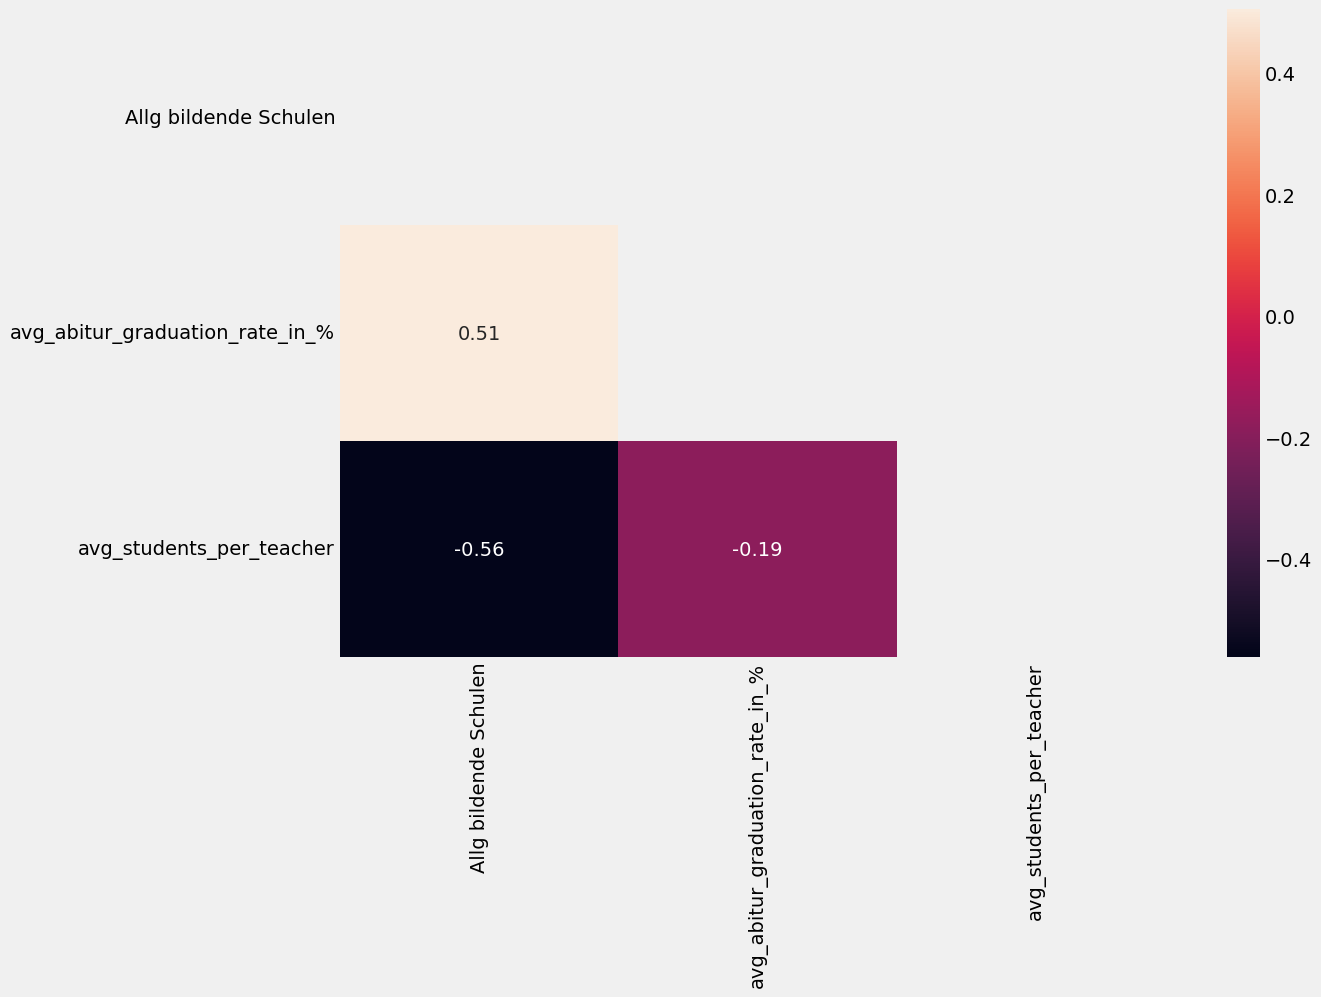

In [26]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, mask = mask ,annot=True)

In [27]:
test2 = df_merged.copy()

In [28]:
test2 = test2[['Allg bildende Schulen', 'avg_abitur_graduation_rate_in_%']].astype(float)


In [29]:
#6.35*100, height=3.8*100

In [30]:
import plotly.express as px

fig1 = px.scatter(test2, x='Allg bildende Schulen', y='avg_abitur_graduation_rate_in_%', trendline='ols', width=10.5*100, height=6.7*100)
fig1.update_layout(xaxis_title='Investment in €', yaxis_title='Abitur graduation rate in %')

#title='Correlation between Investment and Abitur Graduation Rate', 
# fig2 = px.scatter(avg_key_indicator, x='Allg bildende Schulen', y='avg_abitur_graduation_rate_perc', trendline='ols')
# fig2.update_layout(title='Correlation between Lesson Hours and Dropout Rate', xaxis_title='Investment', yaxis_title='Dropout Rate')

fig1.show()
# fig2.show()

import plotly.graph_objects as go

fig = go.Figure()

# add scatter plot for avg_abitur_graduation_rate_perc
# fig.add_trace(go.Scatter(x=avg_key_indicator['Allg bildende Schulen'], y=avg_key_indicator['avg_abitur_graduation_rate_perc'], mode='markers', name='Avg Dropout Rate', color='Federal States'))

# add scatter plot for avg_abitur_graduation_rate_in_%
fig.add_trace(go.Scatter(x=test2['Allg bildende Schulen'], y=test2['avg_abitur_graduation_rate_in_%'], mode='markers', name='avg_abitur_graduation_rate_in_%'))

# update layout
fig.update_layout(title='Lesson Hours vs. Exam Performance and Dropout Rates', xaxis_title='Average Investment', yaxis_title='Percentage', legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01))

fig.show()

In [31]:
# correlation student-teacher-ratio and graduation rate

test3 = df_invest_graduation_teacher.copy()

test3 = test3[['Allg bildende Schulen', 'avg_abitur_graduation_rate_in_%', 'avg_students_per_teacher']].astype(float)


In [36]:
import plotly.express as px

fig1 = px.scatter(test3, x='avg_students_per_teacher', y='avg_abitur_graduation_rate_in_%', trendline='ols', width=10.5*100, height=6.7*100)
fig1.update_layout(xaxis_title='Student to teacher ratio', yaxis_title='Abitur graduation rate in %')

#title='Correlation between Student-Teacher-Ratio and Abitur Graduation Rate', 
# fig2 = px.scatter(avg_key_indicator, x='avg_students_per_teacher', y='avg_abitur_graduation_rate_perc', trendline='ols')
# fig2.update_layout(title='Correlation between Lesson Hours and Dropout Rate', xaxis_title='Investment', yaxis_title='Dropout Rate')

fig1.show()
# fig2.show()

import plotly.graph_objects as go

fig = go.Figure()

# add scatter plot for avg_abitur_graduation_rate_perc
# fig.add_trace(go.Scatter(x=avg_key_indicator['avg_students_per_teacher'], y=avg_key_indicator['avg_abitur_graduation_rate_perc'], mode='markers', name='Avg Dropout Rate', color='Federal States'))

# add scatter plot for avg_abitur_graduation_rate_in_%
fig.add_trace(go.Scatter(x=test3['avg_students_per_teacher'], y=test3['avg_abitur_graduation_rate_in_%'], mode='markers', name='avg_abitur_graduation_rate_in_%'))

# update layout
fig.update_layout(title='Lesson Hours vs. Exam Performance and Dropout Rates', xaxis_title='Average Investment', yaxis_title='Percentage', legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01))

fig.show()

In [33]:
# fig = plt. figure (figsize= (15, 10))
# plt.barh(y=df_avg["Federal States"], width=df_avg["avg_abitur_student in €"], color="#ee7a87", label=" ")
# plt.barh (y=schulform["Federal States"], width=schulform["avg_abitur_graduation_rate in %"], left=schulform["avg_abitur_graduation_rate in %"],color="#4682b4", label=" ")
# plt.xlabel (" ")

In [34]:
# # Step 1: Sort values and select top 4
# df1_sorted = df_avg.sort_values(by='avg_abitur_student_in_€', ascending=False)
# top4 = df1_sorted.head(5)

# # Step 2: Create new dataframe
# df_new = pd.DataFrame({'Federal States': top4['Federal States'], 'avg_abitur_student_in_€': top4['avg_abitur_student_in_€']})

# # Step 3: Merge dataframes
# df_merged = pd.merge(df_new, schulform, on='Federal States')

# # Step 4: Create donut plot
# labels = df_merged['Federal States']
# sizes = df_merged['avg_abitur_student_in_€']
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',]

# plt.figure(figsize=(13, 7))
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sum(sizes) / 100), startangle=90, pctdistance=0.85) #autopct='%1.1f%%'
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# ax1.axis('equal')  
# plt.tight_layout()
# plt.title(' ')
# plt.show()


In [35]:
df_merged.shape

(16, 3)